# Primer documento de Qiskit
Implementación basica de un circuito, se aplican dos compuertas y se simula el circuito de manera local y externa en las computadoras de IBM.

In [3]:
from qiskit import *
%matplotlib inline

In [6]:
circ = QuantumCircuit(2,2)
circ.h(1)
circ.cx(0,1)
circ.measure(range(0,2),range(0,2))

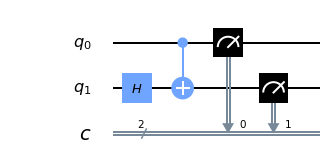

In [7]:
circ.draw(output = 'mpl')

###  Simulación del circuito de manera local con Qiskit-AER

In [17]:
simulator = Aer.get_backend('qasm_simulator')

In [24]:
result = execute(circ, backend = simulator).result()

In [25]:
from qiskit.tools.visualization import plot_histogram

In [26]:
counts = result.get_counts(circ)

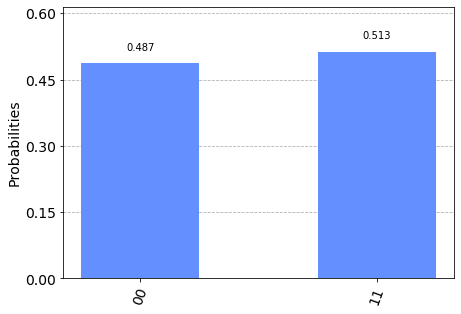

In [27]:
plot_histogram(counts)

### Mandando el programa a una computadora cuántica de IBM


In [28]:
IBMQ.save_account('ed7c8f953c508aa81558916d79c8b7feb40aa8625407d4af3783c75450a1340efd2dae23449e968374b2cb8b932c7bf4b8143186aead68247e28fde6c9293cde')

In [29]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_essex')

In [31]:
job = execute(circ , backend = qcomp)

In [32]:
from qiskit.tools.monitor import job_monitor

In [33]:
job_monitor(job)

Job Status: job has successfully run


In [38]:
result=job.result()

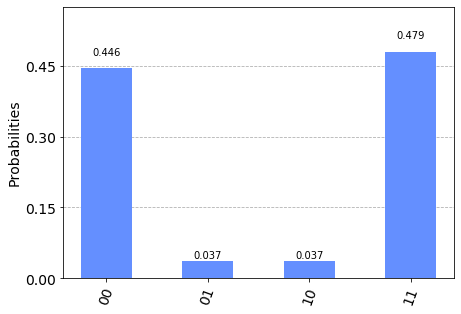

In [39]:
plot_histogram(result.get_counts(circ))